# IBM Badge - Statistics

## Victor Hugo Negrisoli

### Desenvolvedor Full-Stack Pleno | Analista de Dados

### Dispersão (scatter), regressão, pivoting, crosstabing

Este notebook destina-se aos conteúdos desenvolvidos durante o curso Statistics 101 da IBM através da plataforma IBM Cognitive Class. Neste módulo será feita uma grande utilização da biblioteca Seaborn por sua facilidade em plotting de dispersões, regressões e funções estatísticas.

# Sumário

1. [Importando e descrevendo os dados tratados no primeiro notebook](#Importando-e-descrevendo-os-dados-tratados-no-primeiro-notebook)
    1. [Configurações de gráficos da Matplotlib](#Configurações-de-gráficos-da-Matplotlib)
2. [Visualizando a dispersão das variáveis](#Visualizando-a-dispersão-das-variáveis)
3. [Pivoteamento (Pivoting)](#Pivoteamento-(Pivoting))

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importando e descrevendo os dados tratados no primeiro notebook

In [2]:
dados = pd.read_csv('dados/dados_tratados.csv')

In [3]:
dados.head(10)

,Unnamed: 0,minority,age,gender,credits,beauty,eval,students,allstudents
0,0,yes,36,female,more,0.289916,4.3,24,43
1,1,yes,36,female,more,0.289916,3.7,86,125
2,2,yes,36,female,more,0.289916,3.6,76,125
3,3,yes,36,female,more,0.289916,4.4,77,123
4,4,no,59,male,more,-0.737732,4.5,17,20
5,5,no,59,male,more,-0.737732,4.0,35,40
6,6,no,59,male,more,-0.737732,2.1,39,44
7,7,no,51,male,more,-0.571984,3.7,55,55
8,8,no,51,male,more,-0.571984,3.2,111,195
9,9,no,40,female,more,-0.677963,4.3,40,46


In [4]:
dados.tail(10)

,Unnamed: 0,minority,age,gender,credits,beauty,eval,students,allstudents
453,453,yes,42,female,more,0.420400,3.3,52,67
454,454,yes,42,female,more,0.420400,3.2,54,66
455,455,yes,42,female,single,0.420400,4.1,28,35
456,456,yes,29,female,more,-0.848727,3.3,19,26
457,457,no,41,female,more,0.408168,2.3,10,12
458,458,no,37,male,more,0.933396,3.5,15,17
459,459,no,58,female,more,0.111563,3.5,26,34
460,460,no,42,male,more,-0.900580,4.0,45,86
461,461,no,39,male,more,0.643014,4.3,22,29
462,462,no,51,female,more,0.391822,3.0,47,67


#### Configurações de gráficos da Matplotlib

In [118]:
def configurar_plot(titulo, x, y, altura, largura):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(altura, largura)
    plt.show()

### Visualizando a dispersão das variáveis

Vamos verificar a dispersão entre as variáveis idade e o total de estudantes, analisando separadamente por sexo

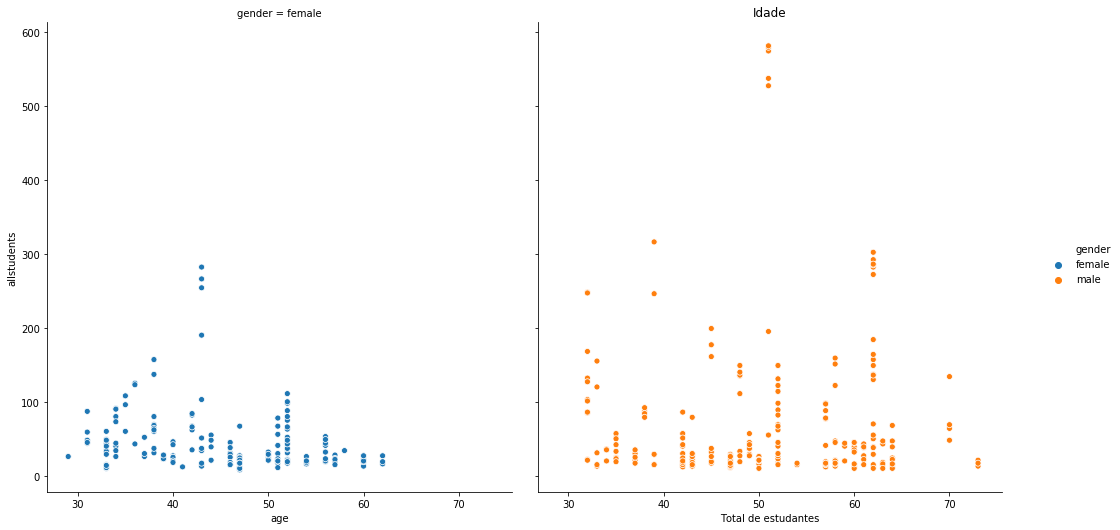

In [6]:
sns.relplot(
    x = "age",
    y = "allstudents",
    hue = "gender", 
    col ="gender",
    data = dados
);

configurar_plot(
    'Idade',
    'Total de estudantes',
    'Dispersão de idade por total de estudantes para o sexo masculino e feminino', 
    16,
    8
)

Vamos agora realizar a mesma análise, porém, iremos verificar dispersão entre avaliação e o total de estudantes, destacando pelo sexo

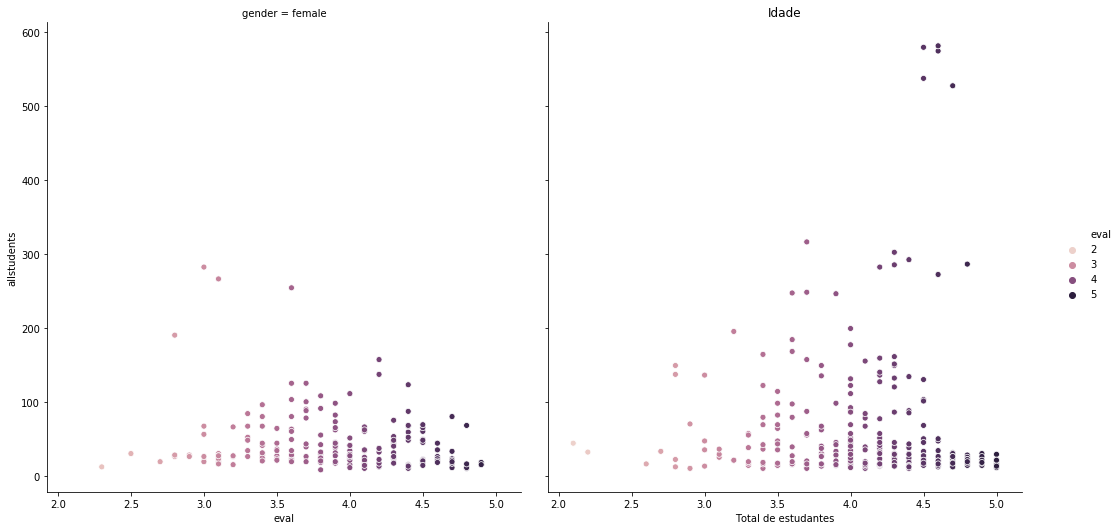

In [7]:
sns.relplot(
    x = "eval",
    y = "allstudents",
    hue = "eval", 
    col ="gender",
    data = dados
);

configurar_plot(
    'Idade',
    'Total de estudantes',
    'Dispersão de idade por total de estudantes para as avaliações', 
    16,
    8
)

Vamos também verificar a dispersão da beleza pela quantidade de alunos, será que há alguma relação?

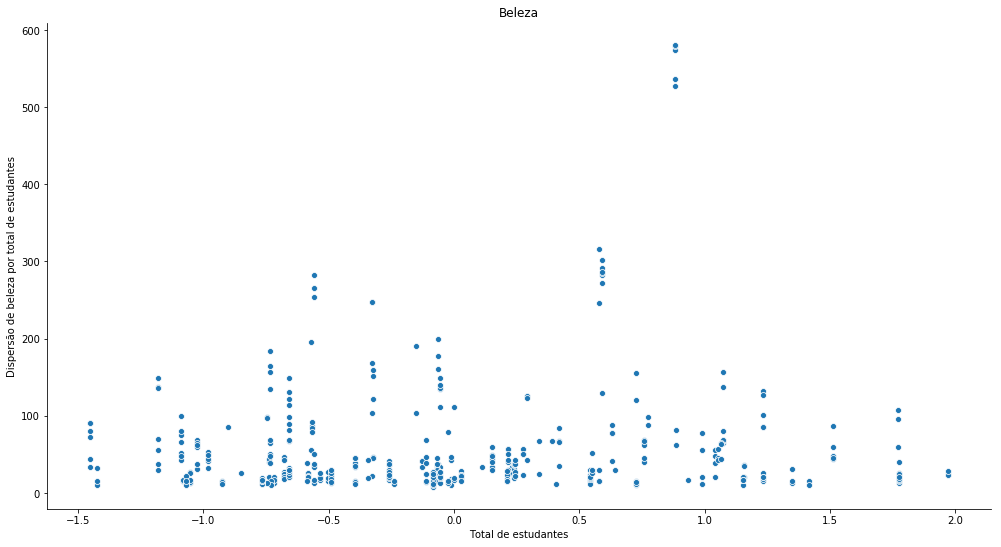

In [8]:
sns.relplot(x = "beauty", y = "allstudents", data = dados)

configurar_plot(
    'Beleza',
    'Total de estudantes',
    'Dispersão de beleza por total de estudantes', 
    16,
    8
)

Vamos agora avaliar diferenciando por masculino e feminino para verificar se há diferença entre os sexos que influencie na quantidade de alunos em nosso dataset

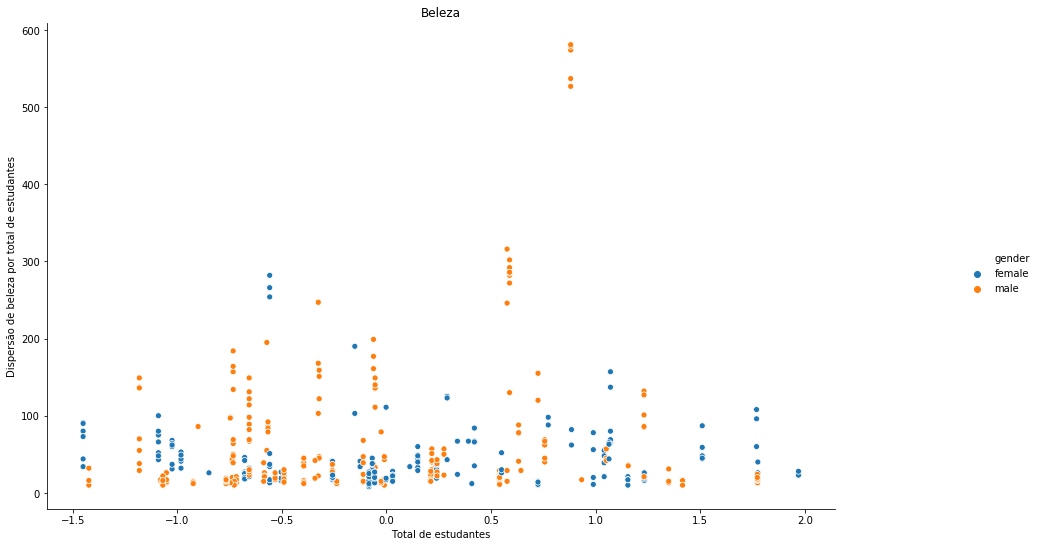

In [9]:
sns.relplot(x = 'beauty', y = 'allstudents', hue = 'gender', data = dados)

configurar_plot(
    'Beleza',
    'Total de estudantes',
    'Dispersão de beleza por total de estudantes', 
    16,
    8
)

### Regressão

Após avaliarmos a correlação existente entre algumas das variáveis, vamos verificar se há uma regressão entre elas. Primeiramente, iremos avaliar se há uma regressão entre a idade e o total de alunos.

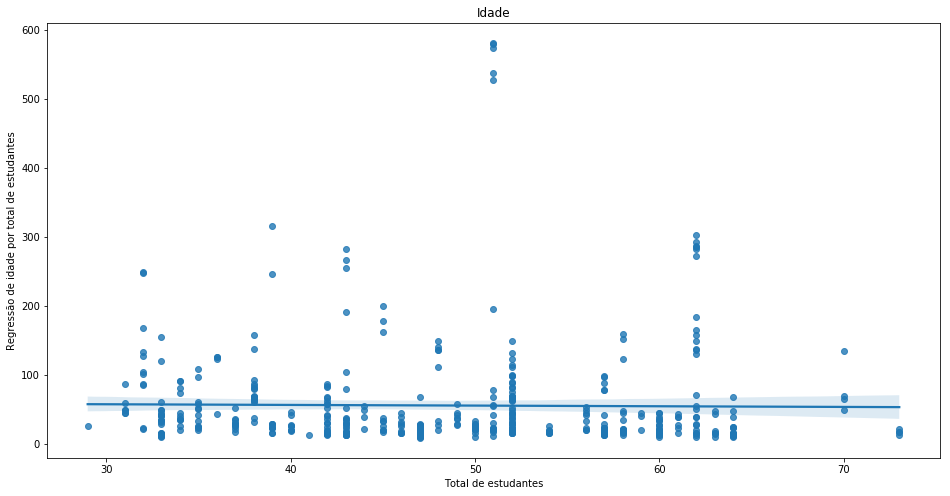

In [10]:
sns.regplot(x='age', y='allstudents', data=dados)

configurar_plot(
    'Idade',
    'Total de estudantes',
    'Regressão de idade por total de estudantes', 
    16,
    8
)

Agora, vamos verificar se há uma regressão entre a beleza e o total de alunos.

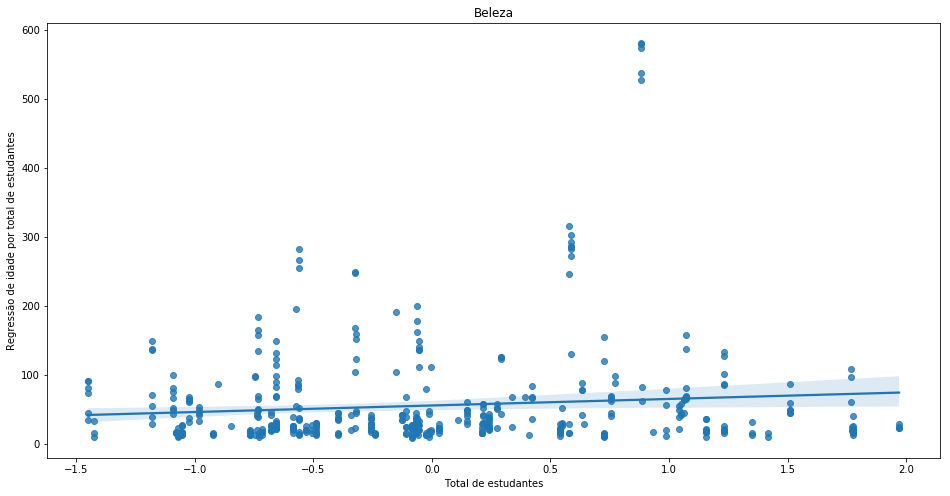

In [11]:
sns.regplot(x = 'beauty', y = 'allstudents', data = dados)

configurar_plot(
    'Beleza',
    'Total de estudantes',
    'Regressão de idade por total de estudantes', 
    16,
    8
)

Por fim, podemos verificar se, quanto maior a quantidade de avaliações, implica-se em um maior número de alunos, para isto, veremos se há uma regressão no aumento de alunos e de avaliação.

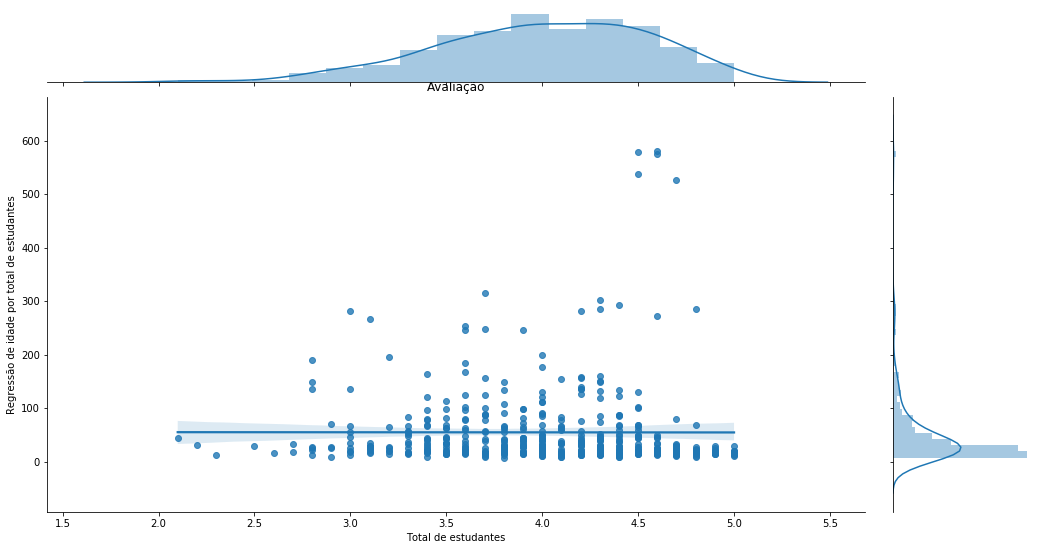

In [12]:
sns.jointplot(x = 'eval', y = 'allstudents', data = dados, kind = 'reg')

configurar_plot(
    'Avaliação',
    'Total de estudantes',
    'Regressão de idade por total de estudantes', 
    16,
    8
)

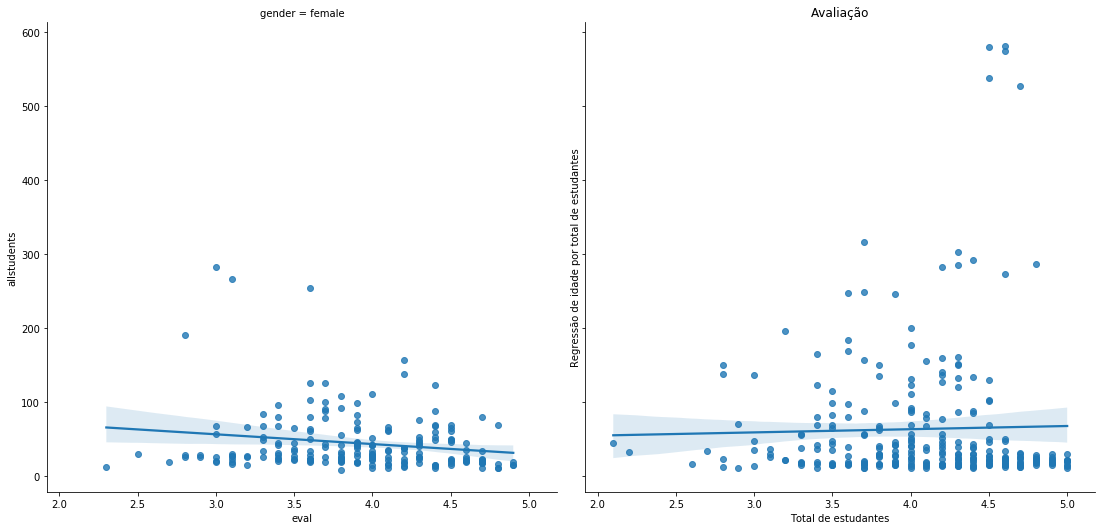

In [13]:
sns.lmplot(x = 'eval', y = 'allstudents', col = "gender", data = dados)

configurar_plot(
    'Avaliação',
    'Total de estudantes',
    'Regressão de idade por total de estudantes', 
    16,
    8
)

### Pivoteamento (Pivoting)

Vamos criar um pivoteamento, parecido com a Tabela Dinâmica do Excel ou cubos OLAP em um banco de dados multidimensional em um estudo sobre Business Intelligence. Iremos pivotear nosso DataFrame por sexo, nas colunas de avaliação e idade, e iremos verificar a quantidade de alunos.

In [69]:
print(dados.columns)

Index(['Unnamed: 0', 'minority', 'age', 'gender', 'credits', 'beauty', 'eval',
       'students', 'allstudents'],
      dtype='object')


Vamos visualizar os dados criando uma tabela pivô analisando o gênero pela idade e minoridade. Por fim, iremos substituir valores NaN (caso existam) por 0.

In [70]:
dados_pivot_age = pd.pivot_table(
    dados, 
    index = 'age',
    columns = ['gender', 'minority'], 
    values = 'allstudents'
)

dados_pivot_age.fillna(0, inplace = True)

dados_pivot_age

gender        female                    male           
minority          no         yes          no        yes
age                                                    
29          0.000000   26.000000    0.000000   0.000000
31         55.166667    0.000000    0.000000   0.000000
32          0.000000    0.000000  121.818182   0.000000
33         31.611111    0.000000   66.800000   0.000000
34         59.750000    0.000000   30.333333   0.000000
35          0.000000   88.000000   40.333333  27.333333
36          0.000000  104.000000    0.000000   0.000000
37         34.000000    0.000000   27.000000   0.000000
38         74.230769    0.000000   85.500000   0.000000
39         24.500000    0.000000  108.333333   0.000000
40         27.875000    0.000000    0.000000   0.000000
41         12.000000    0.000000    0.000000   0.000000
42         72.000000   63.000000   32.750000   0.000000
43        100.300000  146.500000   24.307692   0.000000
44          0.000000   40.750000    0.000000   0.000000
45          0.000000    0.000000   72.100000   0.000000
46         25.666667    0.000000    0.000000   0.000000
47         24.714286   20.846154   17.846154  17.875000
48          0.000000    0.000000   93.750000   0.000000
49          0.000000    0.000000   39.000000   0.000000
50         26.000000    0.000000   13.000000  22.900000
51         33.833333    0.000000  435.428571   0.000000
52         54.047619    0.000000   72.578947  18.857143
54          0.000000   19.600000   15.666667   0.000000
56         35.125000    0.000000    0.000000   0.000000
57         21.400000    0.000000   36.888889   0.000000
58         34.000000    0.000000   51.461538   0.000000
59          0.000000    0.000000   34.666667   0.000000
60         21.000000    0.000000   27.090909   0.000000
61          0.000000    0.000000   30.666667   0.000000
62         20.666667    0.000000  140.681818   0.000000
63          0.000000    0.000000   23.285714   0.000000
64          0.000000    0.000000   24.384615   0.000000
70          0.000000    0.000000   78.750000   0.000000
73          0.000000    0.000000   17.000000   0.000000

Vamos agora substituir os valores NaN por zero

Agora, vamos plotar um histograma das 4 novas colunas multiindexadas

In [71]:
dados_pivot_age.columns

MultiIndex([('female',  'no'),
            ('female', 'yes'),
            (  'male',  'no'),
            (  'male', 'yes')],
           names=['gender', 'minority'])

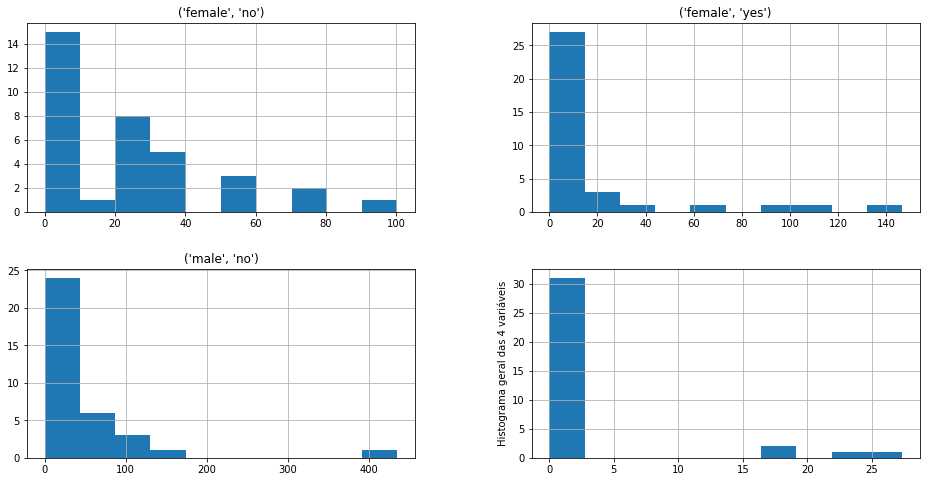

In [72]:
dados_pivot_age.hist()

configurar_plot(
    '',
    '',
    'Histograma geral das 4 variáveis', 
    16,
    8
)

Verificando um pivoteamento dos dados analisando os gêneros pela avaliação e o total de estudantes

In [78]:
dados_pivot_gender = pd.pivot_table(
    dados, 
    index = 'gender',
    columns = ['eval'], 
    values = 'allstudents'
)

dados_pivot_gender.fillna(0, inplace = True)

dados_pivot_gender

eval,2.1,2.2,2.3,2.5,2.6,2.7,2.8,2.9,3.0,3.1,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
gender,,,,,,,,,,,,,,,,,,,,,
female,0.0,0.0,12.0,30.0,0.0,19.0,81.333333,27.0,78.333333,58.285714,...,34.300000,47.181818,38.818182,50.545455,39.833333,26.571429,26.888889,26.25,16.000,0.0
male,44.0,32.0,0.0,0.0,16.0,33.0,80.000000,40.0,57.750000,30.000000,...,48.363636,66.300000,74.739130,53.764706,101.388889,98.888889,62.666667,47.60,20.625,18.5


Por fim, veremos o pivoteamento multiindexado por sexo, idade e minoridade, avaliando os valores médios de avaliação e total de alunos.

In [109]:
dados_pivot_gender_age = pd.pivot_table(
    dados, 
    index = ['gender', 'age', 'minority'],
    values = ['eval', 'allstudents'],
    aggfunc = np.mean
)

dados_pivot_gender_age.fillna(0, inplace = True)

dados_pivot_gender_age

allstudents      eval
gender age minority                       
female 29  yes         26.000000  3.300000
       31  no          55.166667  4.350000
       33  no          31.611111  4.255556
       34  no          59.750000  3.850000
       35  yes         88.000000  3.600000
       36  yes        104.000000  4.000000
       37  no          34.000000  3.050000
       38  no          74.230769  4.230769
       39  no          24.500000  4.075000
       40  no          27.875000  4.012500
       41  no          12.000000  2.300000
       42  no          72.000000  3.900000
           yes         63.000000  3.475000
       43  no         100.300000  3.910000
           yes        146.500000  3.200000
       44  yes         40.750000  3.725000
       46  no          25.666667  4.344445
       47  no          24.714286  4.014286
           yes         20.846154  3.684615
       50  no          26.000000  3.842857
       51  no          33.833333  3.875000
       52  no          54.047619  3.885714
       54  yes         19.600000  4.260000
       56  no          35.125000  3.887500
       57  no          21.400000  3.480000
       58  no          34.000000  3.500000
       60  no          21.000000  3.914286
       62  no          20.666667  2.966667
male   32  no         121.818182  4.054545
       33  no          66.800000  3.960000
       34  no          30.333333  3.266667
       35  no          40.333333  4.083333
           yes         27.333333  3.266667
       37  no          27.000000  4.016667
       38  no          85.500000  3.850000
       39  no         108.333333  4.183333
       42  no          32.750000  4.150000
       43  no          24.307692  4.346154
       45  no          72.100000  4.300000
       47  no          17.846154  4.384615
           yes         17.875000  3.637500
       48  no          93.750000  4.050000
       49  no          39.000000  3.728571
       50  no          13.000000  3.950000
           yes         22.900000  4.780000
       51  no         435.428571  4.257143
       52  no          72.578947  3.968421
           yes         18.857143  3.985714
       54  no          15.666667  4.266667
       57  no          36.888889  4.044444
       58  no          51.461538  4.484615
       59  no          34.666667  3.533333
       60  no          27.090909  3.927273
       61  no          30.666667  4.216667
       62  no         140.681818  3.868182
       63  no          23.285714  3.671429
       64  no          24.384615  4.107692
       70  no          78.750000  3.825000
       73  no          17.000000  3.900000

Visualizando os totais das variáveis analisadas por sexo, idade e minoridade

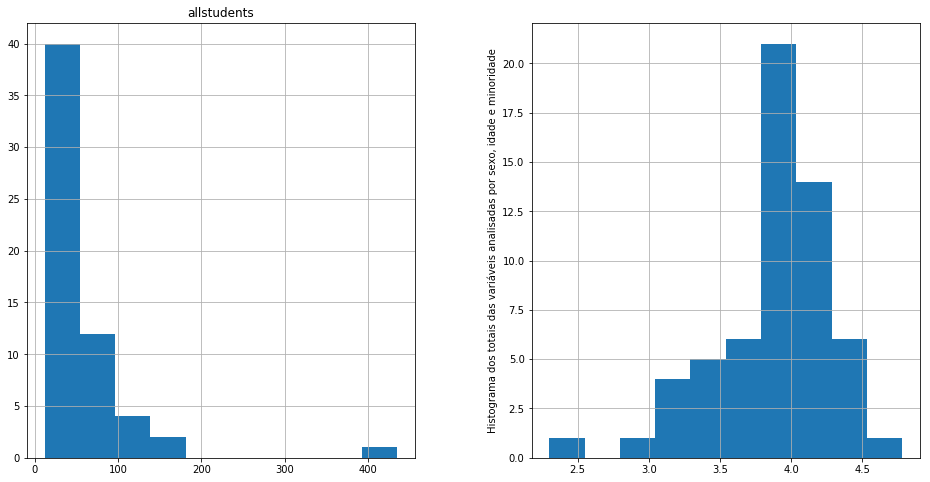

In [117]:
dados_pivot_gender_age.hist()

configurar_plot(
    '',
    '',
    'Histograma dos totais das variáveis analisadas por sexo, idade e minoridade', 
    16,
    8
)

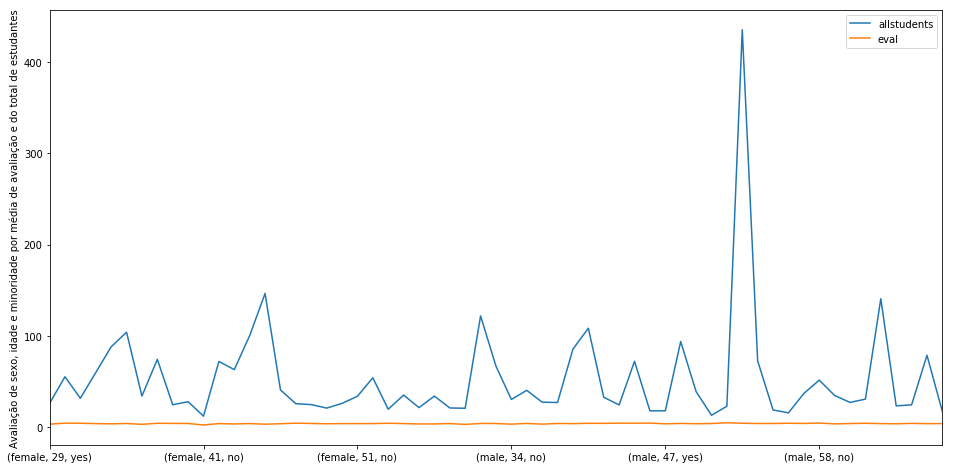

In [114]:
dados_pivot_gender_age.plot()

configurar_plot(
    '',
    '',
    'Avaliação de sexo, idade e minoridade por média de avaliação e do total de estudantes', 
    16,
    8
)